# EDA и визуализация 1 - семинар

In [118]:
%autosave 60

Autosaving every 60 seconds


In [127]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
import mplcyberpunk
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

In [121]:
plt.style.use("cyberpunk")

In [122]:
pd.set_option('display.max_columns', 500)

In [124]:
df = pd.read_csv('loan_data.csv')  # Тут может быть ваш датасет

# Визуализация данных
### строим различные виды графиков в matplotlib + pdf отчет

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [23]:
assert (df['Loan_ID'].nunique()) == df.shape[0], 'не прошли проверку по DQ уникальные'

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [42]:
pie_vals_dependents = list(zip(df['Dependents'].value_counts().index, round(df['Dependents'].value_counts(normalize=True) * 100, 2).values))

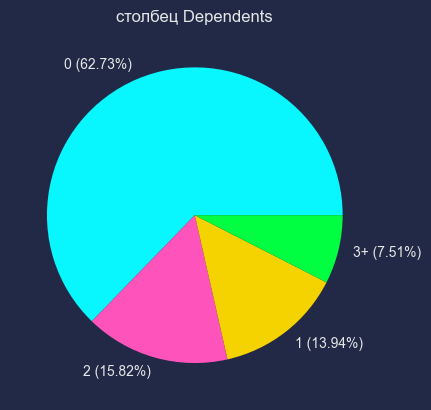

In [46]:
plt.pie(
    df['Dependents'].value_counts()
    , labels=[i[0] + f" ({i[1]}%)" for i in pie_vals_dependents]
)

plt.title('столбец Dependents')
plt.show()

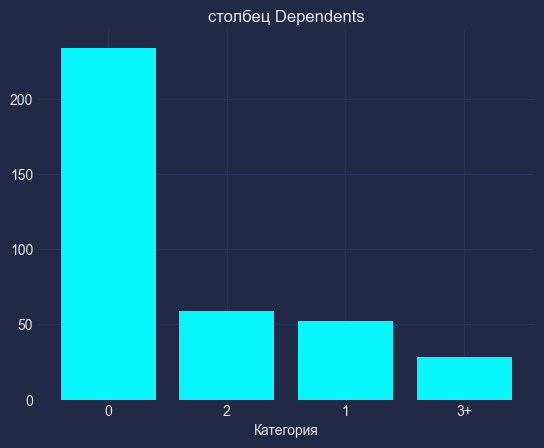

In [125]:
plt.bar(df['Dependents'].value_counts().index, df['Dependents'].value_counts().values, )
plt.title('столбец Dependents')
plt.xlabel('Категория')

plt.show()

In [143]:
text_for_boxplot = """
Медиана кредита в районе 110
Есть кредиты с очень маленькой суммой
(возможно выбросы)
"""

In [144]:
pdf = PdfPages("отчет_eda.pdf", )

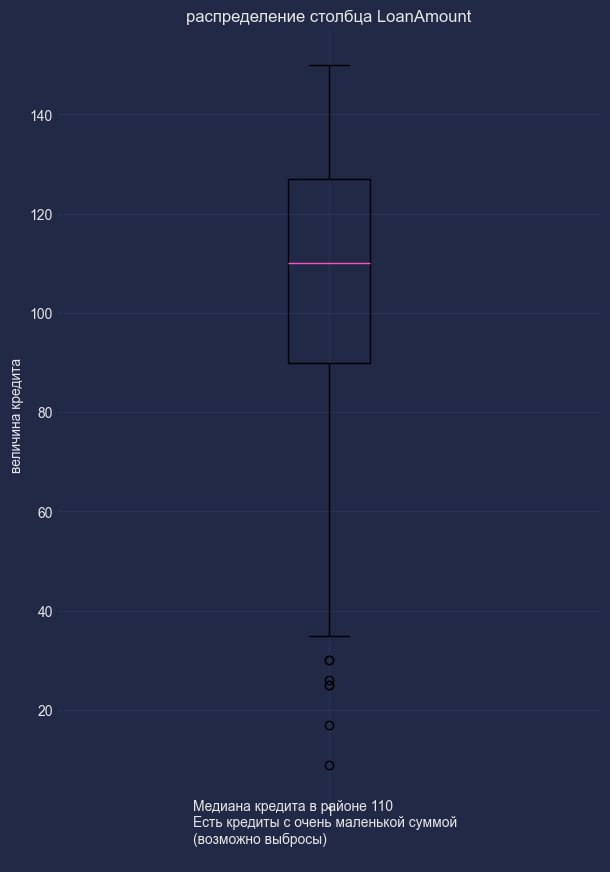

In [145]:
plt.figure(figsize=(7, 10))
plt.boxplot(df['LoanAmount'])
plt.title('распределение столбца LoanAmount')
plt.ylabel('величина кредита')
plt.text(0.75, -10, text_for_boxplot)

pdf.savefig()

## график 2

In [146]:
text_for_boxplot = """
Видим, что в данных нельзя выделить
мажорную или минорную категорию в данных
Распределение категориальной переменной 
не несет рисков при обучении ML моделей
"""

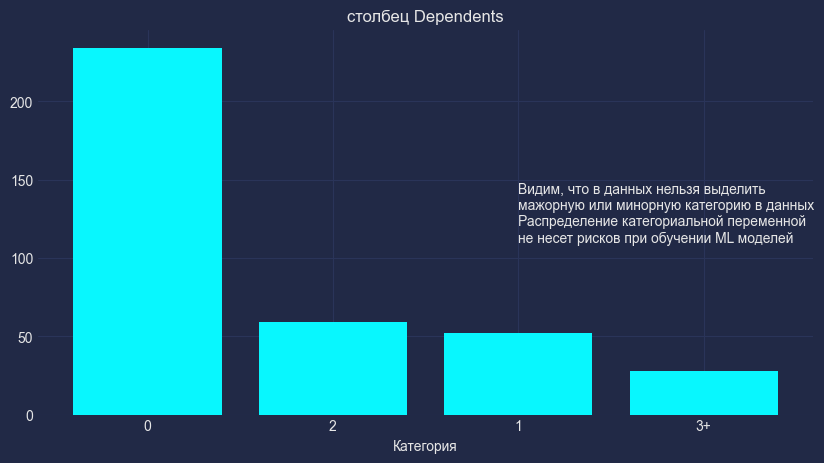

In [147]:
plt.figure(figsize=(10, 5))
plt.bar(df['Dependents'].value_counts().index, df['Dependents'].value_counts().values, )
plt.title('столбец Dependents')
plt.xlabel('Категория')
plt.text(2, 100, text_for_boxplot)
pdf.savefig()

In [148]:
pdf.close()

## Полезные ссылки
- https://habr.com/ru/articles/468295/
- https://plotly.com/python/